In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel("Covid-19.xlsx")

# Basic statistics
print("Basic Statistics:\n", df.describe())

Basic Statistics:
            Confirmed        Active       Deaths   Mortality rate  \
count      26.000000     26.000000    26.000000        26.000000   
mean    15959.461538   6351.000000   527.000000         1.885000   
std     28333.425960  12733.987636  1265.531035         1.588152   
min       366.000000     84.000000     0.000000         0.000000   
25%      2277.250000    807.250000    11.000000         0.675000   
50%      6810.500000   2271.000000    90.500000         1.430000   
75%     13434.500000   4817.500000   473.500000         2.625000   
max    132075.000000  60147.000000  6170.000000         6.090000   

          Recovered  Recovery Rate  
count     26.000000      26.000000  
mean    9079.500000      58.312308  
std    14562.862263      14.459219  
min      135.000000      16.500000  
25%     1440.750000      52.257500  
50%     3725.500000      61.180000  
75%     8835.500000      67.042500  
max    65744.000000      77.830000  


In [8]:
# Clean column names
df.columns = df.columns.str.strip().str.replace('\xa0', '').str.replace('\u200b', '').str.lower()

# Top 5 states with highest confirmed cases
top_confirmed = df.sort_values(by="confirmed", ascending=False).head(5)
print(top_confirmed[["state", "confirmed"]])


           state  confirmed
0    Maharashtra     132075
1          Delhi      59746
2     Tamil Nadu      59377
3        Gujarat      27317
4  Uttar Pradesh      17731


In [29]:
print(df.columns.tolist())


['state', 'confirmed', 'active', 'deaths', 'mortality rate', 'recovered', 'recovery rate']


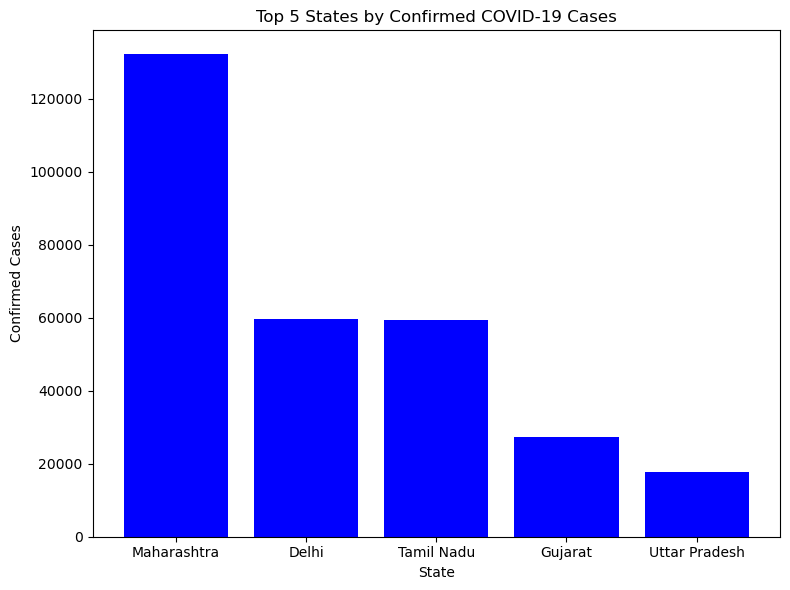

In [30]:
# Plotting top 5 confirmed cases
plt.figure(figsize=(8, 6))
plt.bar(top_confirmed["state"], top_confirmed["confirmed"], color='blue')
plt.title("Top 5 States by Confirmed COVID-19 Cases")
plt.xlabel("State")
plt.ylabel("Confirmed Cases")
plt.tight_layout()
plt.show()


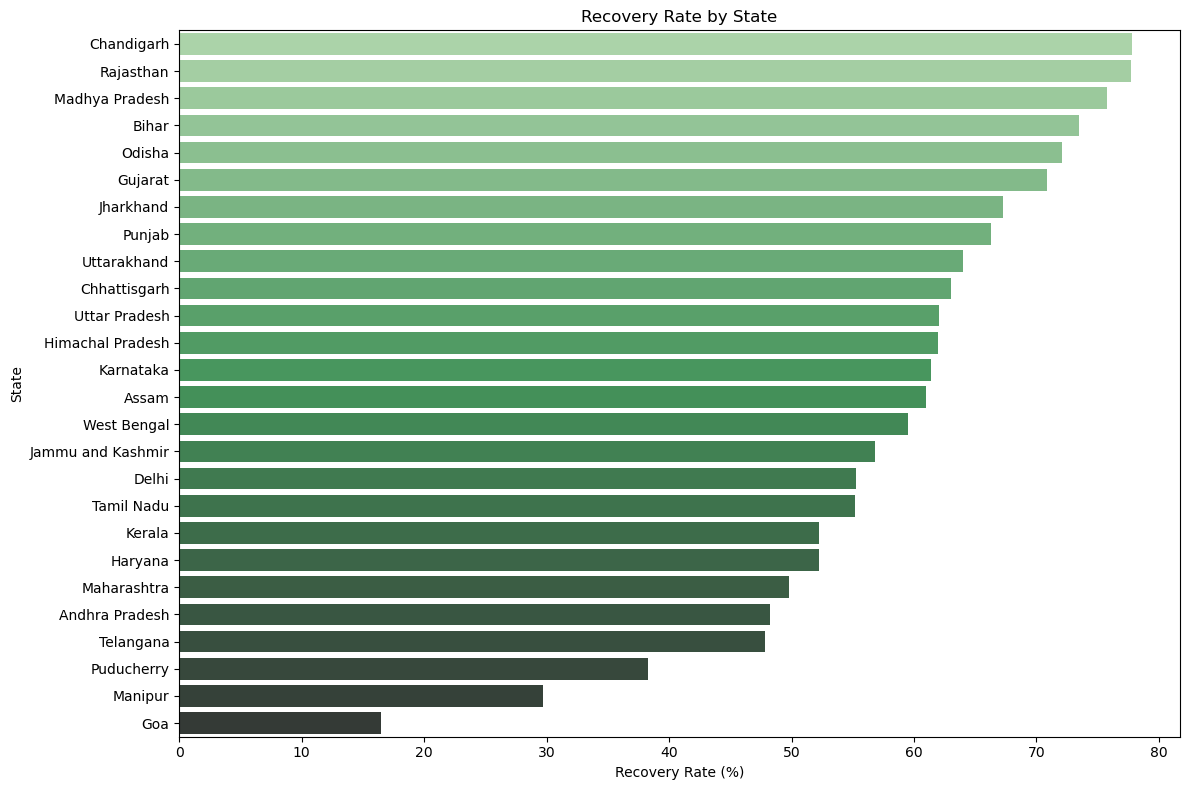

In [9]:
# Bar Plot - Recovery Rate
plt.figure(figsize=(12, 8))
sns.barplot(x="recovery rate", y="state", data=df.sort_values("recovery rate", ascending=False),hue="state", palette="Greens_d")
plt.title("Recovery Rate by State")
plt.xlabel("Recovery Rate (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

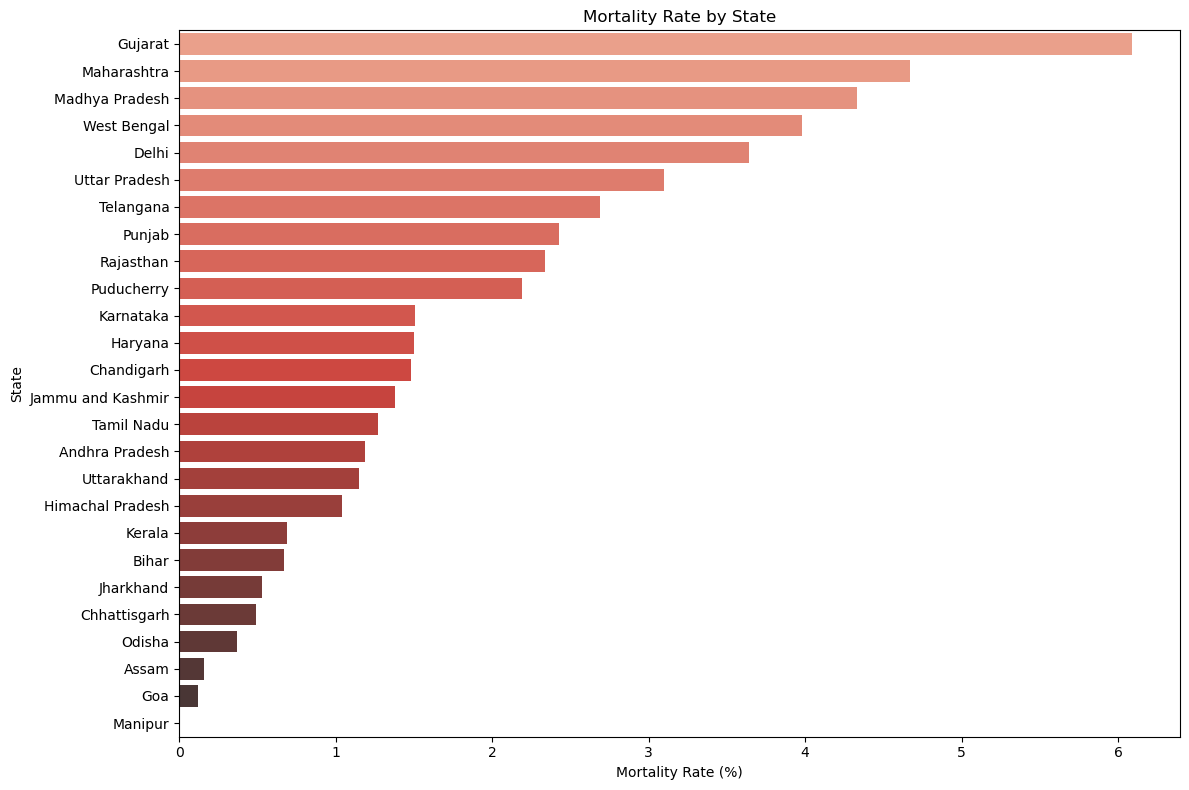

In [38]:
# Bar Plot - Mortality Rate
plt.figure(figsize=(12, 8))
sns.barplot(x="mortality rate", y="state", data=df.sort_values("mortality rate", ascending=False),hue='state', palette="Reds_d")
plt.title("Mortality Rate by State")
plt.xlabel("Mortality Rate (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

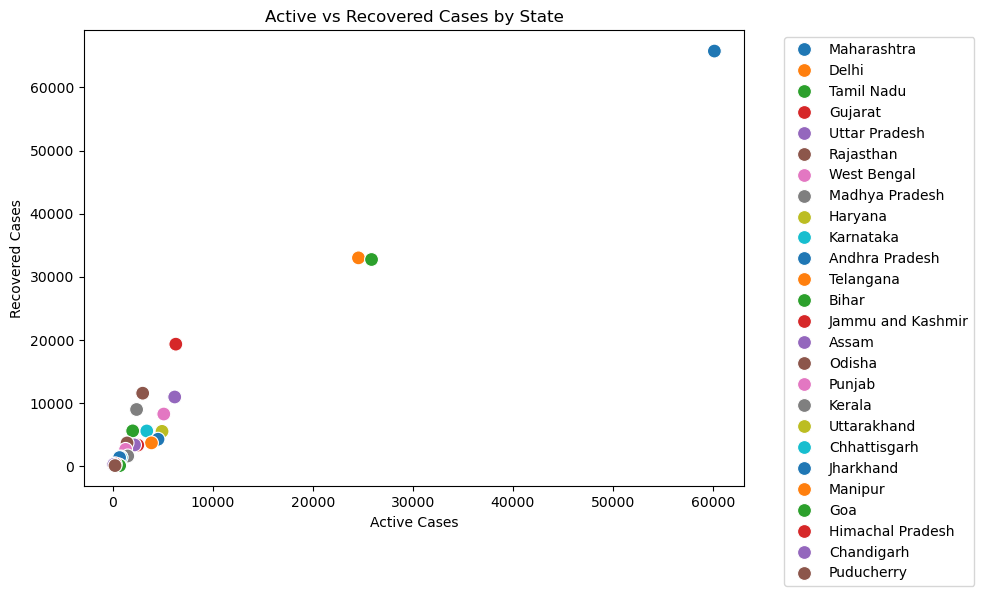

In [10]:
# Scatter Plot - Active vs Recovered
plt.figure(figsize=(10, 6))
sns.scatterplot(x="active", y="recovered", data=df, hue="state", palette="tab10", s=100)
plt.title("Active vs Recovered Cases by State")
plt.xlabel("Active Cases")
plt.ylabel("Recovered Cases")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

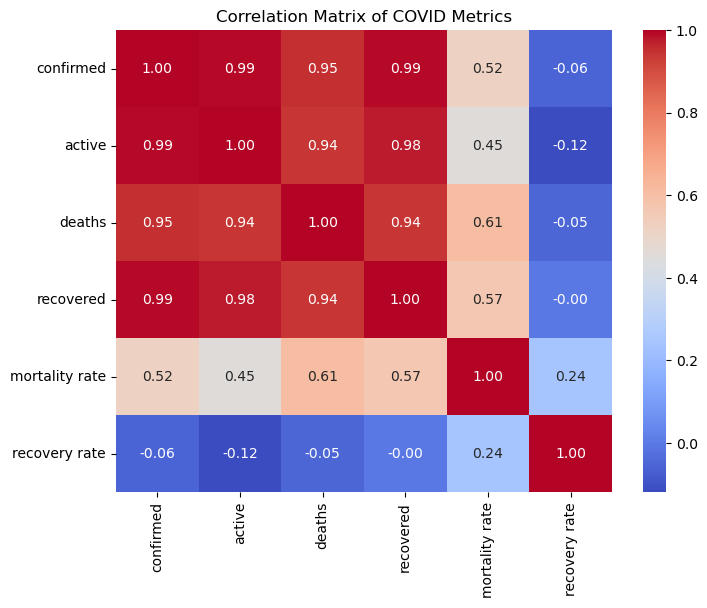

In [14]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[["confirmed", "active", "deaths", "recovered", "mortality rate", "recovery rate"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of COVID Metrics")
plt.show()

In [13]:
#Total confirmed cases, active cases, deaths, and recovered
total_confirmed = df['confirmed'].sum()
total_active = df['active'].sum()
total_deaths = df['deaths'].sum()
total_recovered = df['recovered'].sum()

print(f'Total Confirmed Cases: {total_confirmed}')
print(f'Total Active Cases: {total_active}')
print(f'Total Deaths: {total_deaths}')
print(f'Total Recovered: {total_recovered}')

Total Confirmed Cases: 414946
Total Active Cases: 165126
Total Deaths: 13702
Total Recovered: 236067


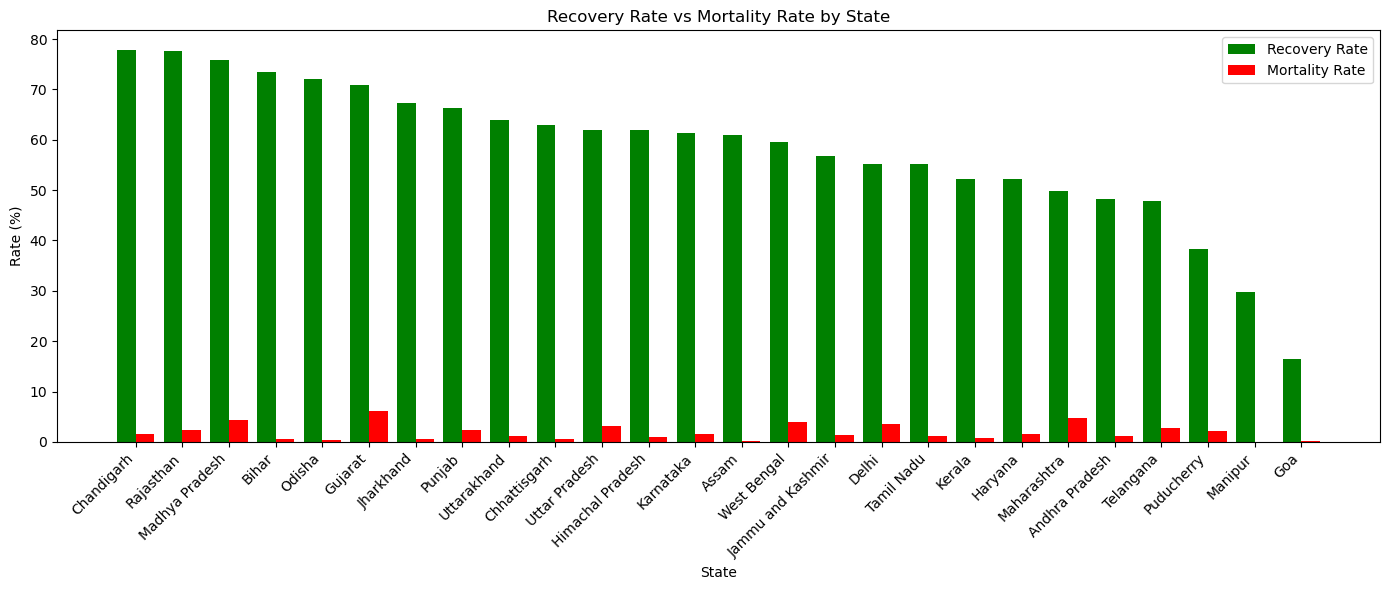

In [20]:
df_sorted = df.sort_values('recovery rate', ascending=False)

# ===Side-by-side bar plot (grouped by state) ===
plt.figure(figsize=(14, 6))
bar_width = 0.4
x = range(len(df_sorted))

# Plot bars
plt.bar(x, df_sorted['recovery rate'], width=bar_width, label='Recovery Rate', color='green')
plt.bar([i + bar_width for i in x], df_sorted['mortality rate'], width=bar_width, label='Mortality Rate', color='red')

# Labels
plt.xlabel('State')
plt.ylabel('Rate (%)')
plt.title('Recovery Rate vs Mortality Rate by State')
plt.xticks([i + bar_width / 2 for i in x], df_sorted['state'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()